In [175]:
#Q1)importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import f_oneway

%matplotlib inline

In [177]:
#Q2)reading the dataset into a dataframe
df= pd.read_csv('insurance.csv')

Shape of Data

In [178]:
#Q3a)
df.shape

(1338, 7)

Data type of each attribute

In [179]:
#Q3b)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


7 attributes 3 are string type ,2 float and 2 int.

In [180]:
#Q3)c)
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No Missing values

5 point summary of data

In [181]:
#Q3)d)
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Distribution of ‘bmi’, ‘age’ and ‘charges’

# Q3)E) Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

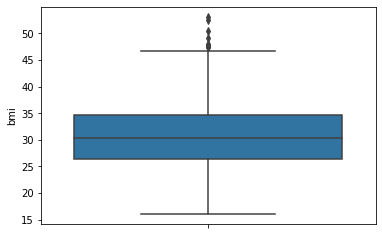

In [182]:

ax = sns.boxplot(y=df['bmi'])

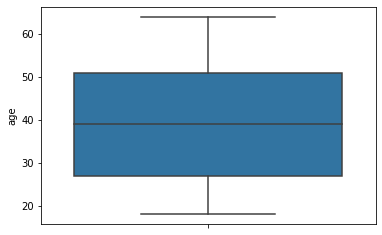

In [183]:
ax = sns.boxplot(y=df['age'])

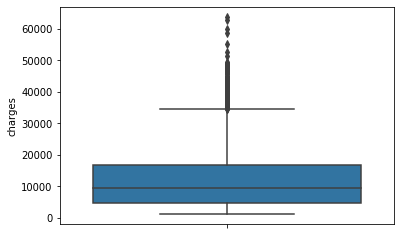

In [184]:
ax = sns.boxplot(y=df['charges'])

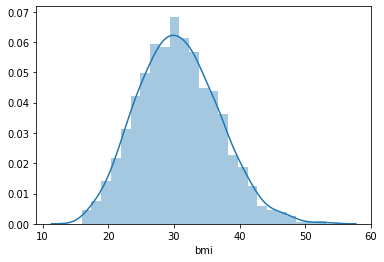

In [185]:
sns.distplot(df['bmi'])

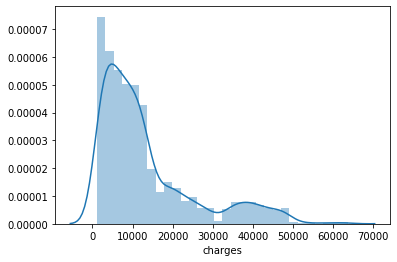

In [186]:
sns.distplot(df['charges'])

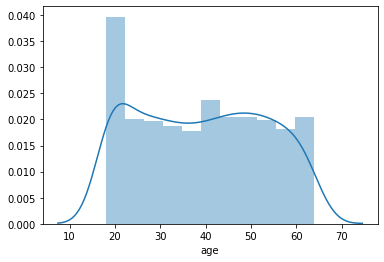

In [187]:
sns.distplot(df['age'])

Q3)f)
Measuring skewness

In [21]:
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In all these three columns, skewness is > 0 which means there is more weight in the left tail of the distribution.

# Q3)g) Checking presence of outliers
Steps to detect outliers
Calculate first(q1) and third quartile(q3) 
Find interquartile range (q3-q1) Find lower bound q1*1.5. Find upper bound q3*1.5. 
Anything that lies outside of lower and upper bound is an outlier.



In [23]:
A3= df["age"].quantile(0.75)
A1= df["age"].quantile(0.25)
IQR= A3-A1

In [32]:
outliers_age= df[(df["age"]<A1-1.5*IQR) | (df["age"]>A3+1.5*IQR)]
print(len(outliers_age))
#NO outliers


0


In [28]:
B3= df["bmi"].quantile(0.75)
B1= df["bmi"].quantile(0.25)
IQR1= B3-B1


In [36]:
outliers_bmi= df[(df["bmi"]<(B1-1.5*IQR1)) | (df["bmi"]>(B3+1.5*IQR1))]
print(len(outliers_bmi))
#9 outliers in BMI column 

9


In [33]:
C3= df["charges"].quantile(0.75)
C1= df["charges"].quantile(0.25)
IQR2= C3-C1

In [37]:
outliers_charges= df[(df["charges"]<(C1-1.5*IQR2)) | (df["charges"]>(C3+1.5*IQR2))]
print(len(outliers_charges))
#139 outliers in BMI column 

139


# Q3)h)distribution of categorical(sex,smoker,region) attributes

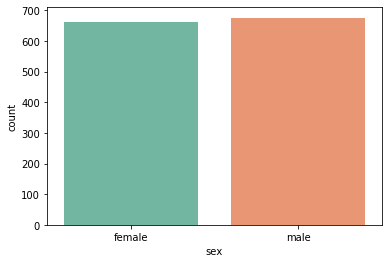

In [45]:
sns.countplot(x ='sex', data = df,palette="Set2")

Males are slighlty more than females

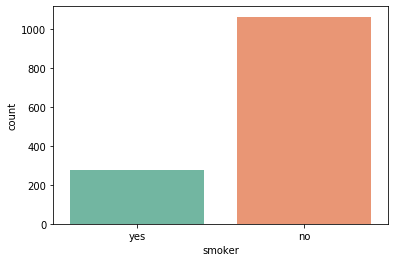

In [46]:
sns.countplot(x ='smoker', data = df,palette="Set2")

The number of non-smokers is significantly more than the number of smokers.

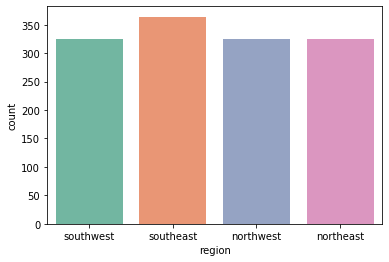

In [47]:
sns.countplot(x ='region', data = df,palette="Set2")

Max number of customers are from SouthEast Region

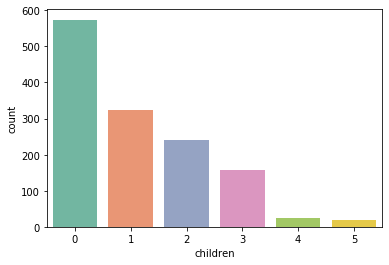

In [48]:
sns.countplot(x ='children', data = df,palette="Set2")

Maximum number of customers donot have children

# Charges V/S categorical Variables

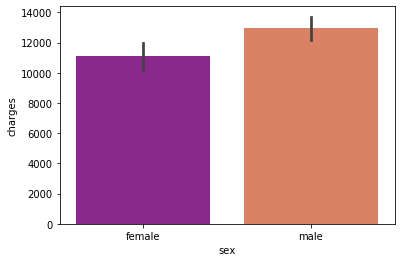

In [49]:
sns.barplot(x ='sex', y ='charges', data = df,  
            palette ='plasma', estimator = np.std)

The charges for the males is more as compared to the females.

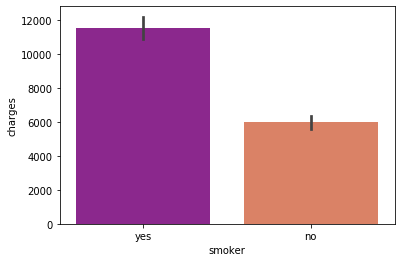

In [50]:
sns.barplot(x ='smoker', y ='charges', data = df,  
            palette ='plasma', estimator= np.std)

The  charges for the smokers is  more as compared to the non-smoker.

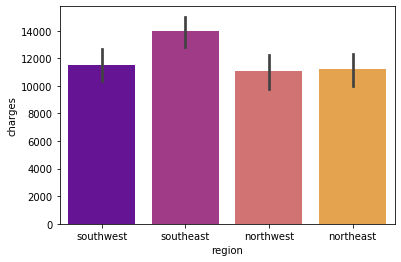

In [51]:

sns.barplot(x ='region', y ='charges', data = df,  
            palette ='plasma',  estimator= np.std)

Charges for the southeast region is maximum and max number of the customers are from southeast region.

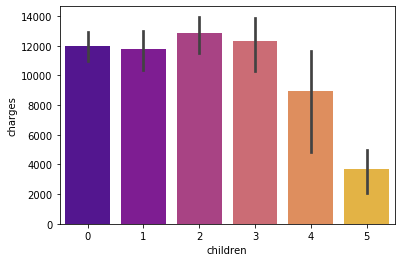

In [52]:
sns.barplot(x ='children', y ='charges', data = df,  
            palette ='plasma',  estimator= np.std)

Customer having 2 number of children has highest charges

# Q3)i)Pair plot that includes all the columns of the data frame

In [188]:
label_encoder = preprocessing.LabelEncoder() 

In [189]:
df['sex']=label_encoder.fit_transform(df['sex']) 

In [190]:
df['smoker']=label_encoder.fit_transform(df['smoker']) 

In [191]:
df['region']=label_encoder.fit_transform(df['region'])

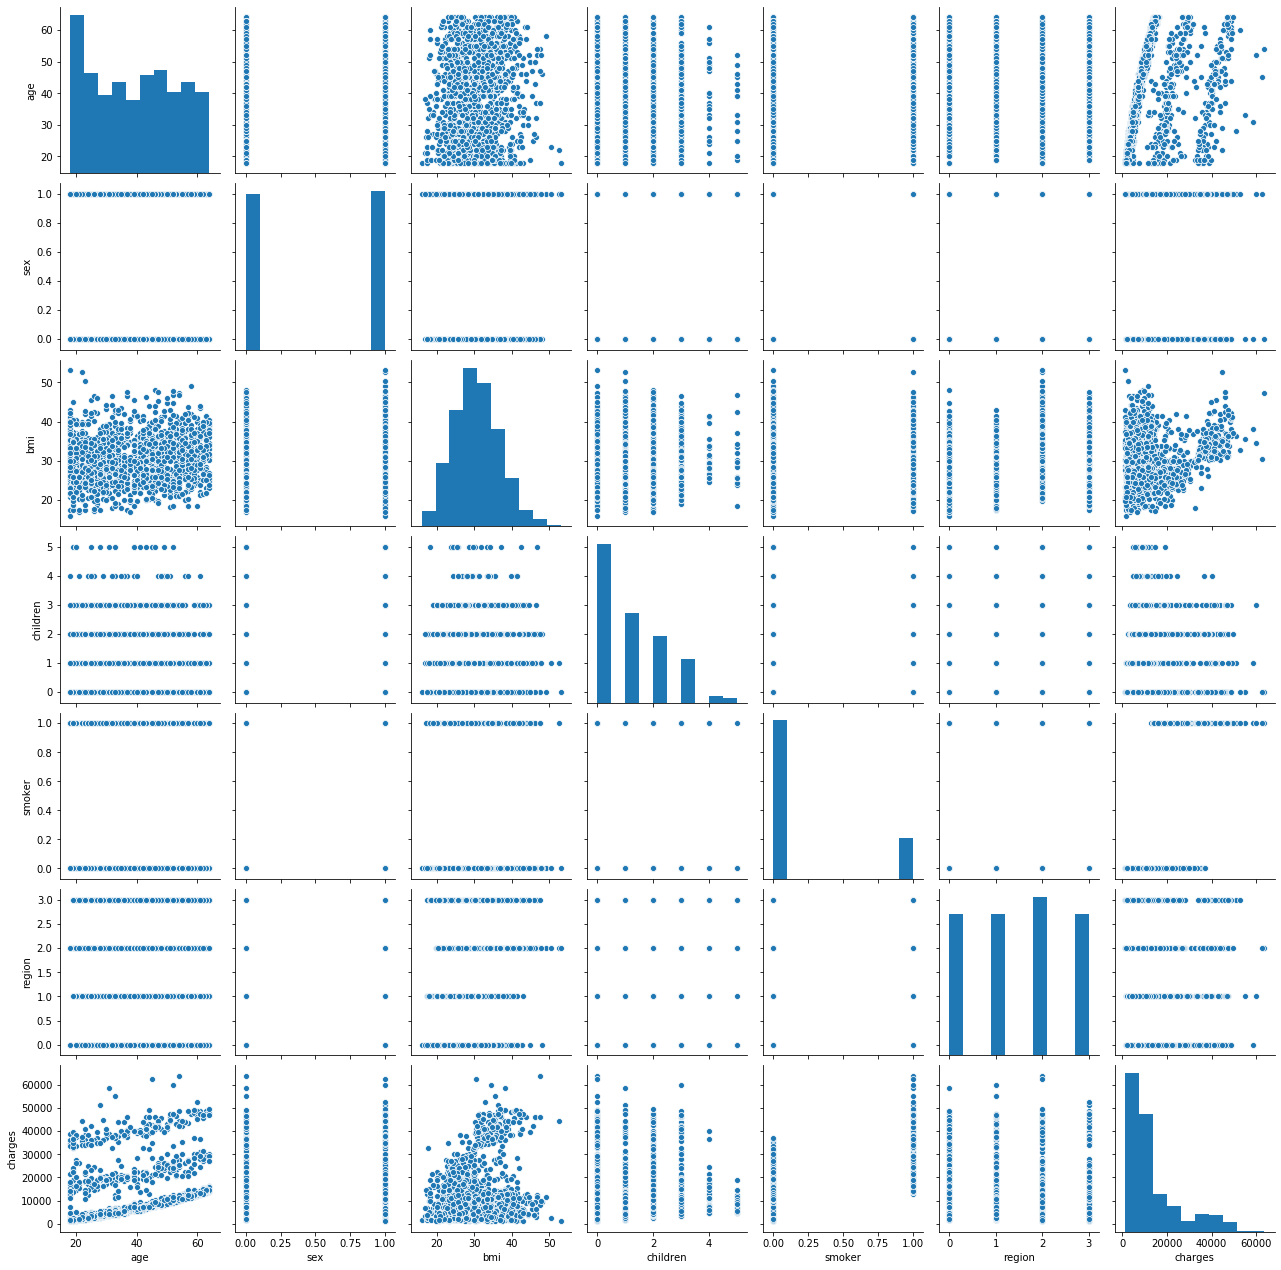

In [192]:
sns.pairplot(df)

positive linear relationship exists between age and charges

# Q4)a)Do charges of people who smoke differ significantly from the people who don't?

In [197]:

df= pd.read_csv('insurance.csv')

In [198]:
sample_non_smoker=df.loc[df.smoker=='no','charges']

In [199]:
sample_smoker=df.loc[df.smoker == 'yes', 'charges']

In [200]:
len(sample_non_smoker)

1064

In [201]:
len(sample_smoker)

274

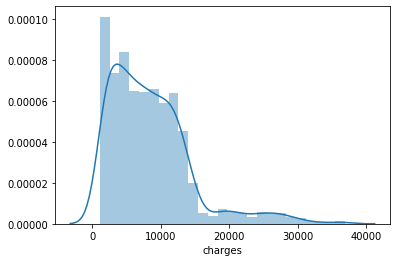

In [202]:
sns.distplot(sample_non_smoker)

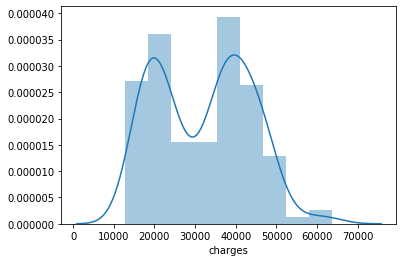

In [203]:
sns.distplot(sample_smoker)

In [204]:
df.loc[df.smoker == 'yes', 'charges']

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

The distributions are not normal yet, since our sample size is reasonably big ( >30 samples), 
I will go ahead with the T-test & Z-test


#Null hypothesis:Charges who smoke doesnot differ from non smokers
#Alternate Hypothesis:Charges Differ for smokers than non smokers

In [205]:
#2-sample z-test
test_statistic, p_value = ztest(sample_non_smoker, sample_smoker)

In [206]:
p_value

0.0

In [207]:
test_statistic

-46.664921172723716

As P value is less than alpha=0.05 we reject the null hypothesis

In [208]:
#2-sample t-test

test_statistic, p_value = ttest_ind(sample_non_smoker, sample_smoker)

In [209]:
p_value

8.271435842177219e-283

# As P value is less than alpha=0.05 we reject the null hypothesis.Charges of people who smoke differ significantly as compared to who dont.

# Q4)b)Bmi of males differ significantly from that of females?

In [210]:
sample_male_bmi=df.loc[df.sex=='male','bmi']

In [211]:
sample_female_bmi=df.loc[df.sex=='female','bmi']

In [212]:
len(sample_male_bmi)

676

In [213]:
len(sample_female_bmi)

662

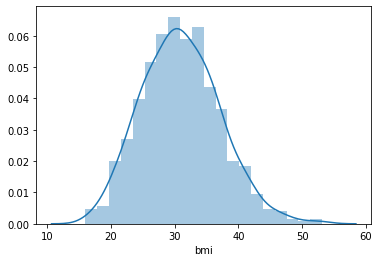

In [214]:
sns.distplot(sample_male_bmi)

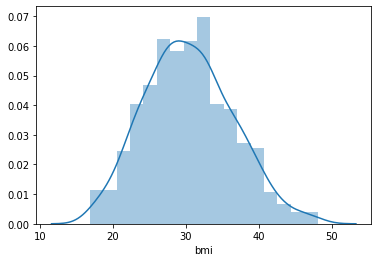

In [215]:
sns.distplot(sample_female_bmi)

The distributions are normal moreover  our sample size is reasonably big ( >30 samples),So we can do t-test or z-test

#Null Hypothesis:Bmi of males and females doesnot differ
#Alternate Hypothesis:Bmi of males and females differ 

In [216]:
#2-sample z-test
test_statistic, p_value = ztest(sample_male_bmi, sample_female_bmi)

In [217]:
p_value

0.08974343679943912

P value is greater than alpha(0.05) thus we cannot reject the null hypothesis

In [218]:
#2-sample z-test
test_statistic, p_value = ttest_ind(sample_male_bmi, sample_female_bmi)

In [219]:
p_value

0.08997637178984932

P value is greater than alpha(0.05) thus we cannot reject the null hypothesis.Bmi is same across gender.

# Q4)c)Is the proportion of smokers significantly different in different genders?

In [220]:
male_smokers=len(df[(df['smoker']=='yes') &(df['sex']=='male')])

In [221]:
female_smokers=len(df[(df['smoker']=='yes') &(df['sex']=='female')])

In [222]:
male=len(df[df['sex']=='male'])

In [223]:
female=len(df[df['sex']=='female'])

#Null hypothesis:Proportion of genders  is not significant in smokers
#Alternate hypothesis:Proportion of genders  is significant in smokers

In [224]:
male_smokers/male,female_smokers/female

(0.23520710059171598, 0.17371601208459214)

#There is difference between the proportion of male and female smokers
##Z-test for proportions

In [225]:


test_statistic, p_value = proportions_ztest([male_smokers, female_smokers], [male,female])


In [226]:
test_statistic

2.7867402154855503

In [227]:
p_value

0.005324114164320532

# P value is less than alpha(0.05) so we reject the null hypothesis.So proportion of smokers is different across gender.

# Q4)d)Is the distribution of bmi across women with no children, one child and two children, the same

In [228]:
pf=df[df['sex']=='female']

In [229]:
pf.groupby(['children']).agg('count')['bmi']

children
0    289
1    158
2    119
3     77
4     11
5      8
Name: bmi, dtype: int64

In [230]:
no_children_bmi=pf[pf['children']==0]['bmi']

In [231]:
one_children_bmi=pf[pf['children']==1]['bmi']

In [232]:
two_children_bmi=pf[pf['children']==2]['bmi']

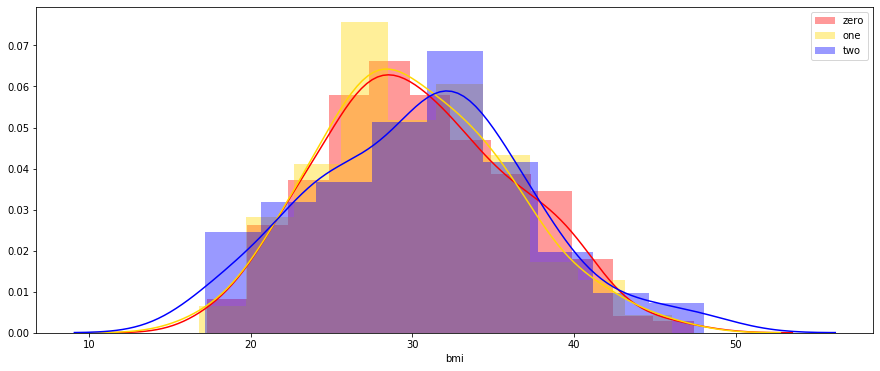

In [233]:
plt.figure(figsize=(15,6))
sns.distplot(no_children_bmi, color = 'Red', label = 'zero')
sns.distplot(one_children_bmi, color = 'Gold', label = 'one')
sns.distplot(two_children_bmi, color = 'blue', label = 'two')
plt.legend()
plt.show()

#NUll hypothesis:Average bmi across customers with 0,1,2 children is same
#Alternate hypothesis:Average bmi across customers with different children are different

#So we perform one way annova if the distribution is similar or not

In [234]:
stat, p_value = f_oneway(no_children_bmi,one_children_bmi,two_children_bmi)

In [235]:
p_value

0.7158579926754841

# So we cannot reject null hypothesis and DISTRIBUTION is similar across 3 categories